# Prosper Loan Exploration

## by Ghada Maher


## Preliminary Wrangling
The Dataset consists of information regarding various factors and variables in Loans given by Prosper Loans from year 2006 to 2014.
This document explores a dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

- [This data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1602316069252000&usg=AOvVaw30T5Cb1SJcH_-mM-PE6sWH) explains the variables in the data set.


In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
# loading the dataset
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
#looking the shape of the data
df.shape

(113937, 81)

In [7]:
# Display dataset summary statistics
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
## Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
# Check for number of null values on each columns
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [10]:
#Check for duplicate records
df.duplicated().sum()

0

In [11]:
# Display Term Value Counts
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [12]:
# Display ProsperScore Value Counts
df.ProsperScore.value_counts().sort_index()

1.0       992
2.0      5766
3.0      7642
4.0     12595
5.0      9813
6.0     12278
7.0     10597
8.0     12053
9.0      6911
10.0     4750
11.0     1456
Name: ProsperScore, dtype: int64

In [13]:
# Display EmployementStatus Value Counts
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 features.Features types are bool(3), float64(50), int64(11), object(17).

### What is/are the main feature(s) of interest in your dataset?

>  I'm interested in BorrowerAPR and LoanStatus features to answer the questions:

- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the  following factors should be influencing : ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,LoanCurrentDaysDelinquent,LoanOriginalAmount

## Cleaning Data

- Choose a subset of the data to work with to include just the columns of intrest.
- Drop rows with missing BorrowerAPR values.
- Rename the ListingCategory (numeric) column
- Convert type of ListingCreationDate colume to date
- Drop notcompleted data from 2005 and 2014.
- Create new column for average Credit Score Range and drop the 2 columns for lower and upper bounds.
- Merge all the past dates for LoanStates into (Past Due).


In [14]:
# Copy of the data to clean it
df_clean = df.copy()

In [15]:
# Choose a subset columns of the data with the features of intrest
sub_cols = ['ListingCreationDate',
            'Term',
            'LoanStatus', 
            'BorrowerAPR',
            'ProsperScore', 
            'ListingCategory (numeric)', 
            'BorrowerState', 
            'Occupation', 
            'EmploymentStatus', 
            'EmploymentStatusDuration', 
            'IsBorrowerHomeowner', 
            'CreditScoreRangeLower', 
            'CreditScoreRangeUpper', 
            'IncomeRange', 
            'LoanCurrentDaysDelinquent', 
            'LoanOriginalAmount']

In [16]:
# Use only the columns of intrest
df_clean = df_clean[sub_cols]

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   ProsperScore               84853 non-null   float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   EmploymentStatusDuration   106312 non-null  float64
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  CreditScoreRangeLower      113346 non-null  float64
 12  CreditScoreRangeUpper      113346 non-null  float64
 13  IncomeRange                11

In [18]:
#Drop rows with missing BorrowerAPR values.
df_clean = df_clean.loc[~df_clean['BorrowerAPR'].isnull()]

In [19]:
df_clean.shape

(113912, 16)

In [20]:
# Rename the ListingCategory (numeric) column
df_clean = df_clean.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})

In [21]:
#convert type of ListingCreationDate colume to date
df_clean['ListingCreationDate'] = df_clean['ListingCreationDate'].astype('datetime64[ns]')

In [22]:
#Drop notcompleted data from 2005 and 2014.
df_clean = df_clean.loc[~df_clean.ListingCreationDate.dt.year.isin([2005, 2014])]

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103178 entries, 0 to 113935
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        103178 non-null  datetime64[ns]
 1   Term                       103178 non-null  int64         
 2   LoanStatus                 103178 non-null  object        
 3   BorrowerAPR                103178 non-null  float64       
 4   ProsperScore               74119 non-null   float64       
 5   ListingCategory            103178 non-null  int64         
 6   BorrowerState              97688 non-null   object        
 7   Occupation                 100137 non-null  object        
 8   EmploymentStatus           100948 non-null  object        
 9   EmploymentStatusDuration   95578 non-null   float64       
 10  IsBorrowerHomeowner        103178 non-null  bool          
 11  CreditScoreRangeLower      102612 non-null  float64 

In [24]:
# Save the Cleaned Dataset into csv file
#df_clean.to_csv('clean_prosper_data.csv', index=False)

## Univariate Exploration

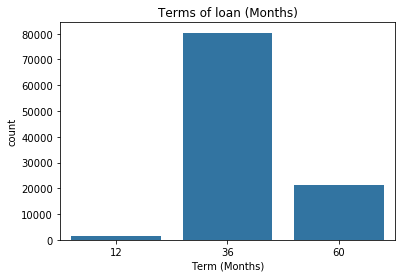

In [25]:
# Loan by term
sb.countplot(data=df_clean,x= 'Term',color= sb.color_palette()[0]);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

- There are three types of terms -> 1,3,5 years
- Most of the terms was of 3 years.Loans of 1 year was negligible.

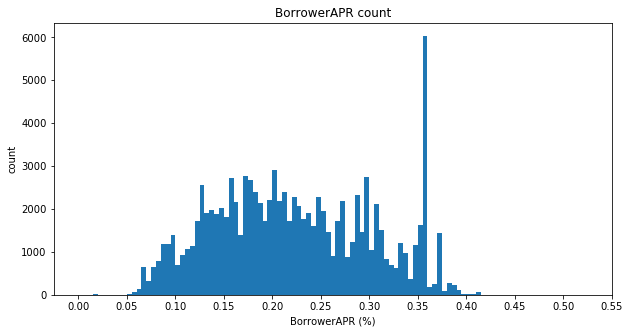

In [26]:
# see the counts for all BorrowerAPR values
plt.figure(figsize=(10,5))
bins = np.arange(0, df_clean['BorrowerAPR'].max(), 0.005)
plt.hist(data = df_clean, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_clean['BorrowerAPR'].max()+0.05, 0.05));

- By looking to the shape we find that: The distribution of APR looks multimodal.
- There are a small spike centered at 0.1, a large spike centered at 0.2. There is also a small spike centered 0.3. Additionally, there is a very shape spike at rate = 0.36. Only very few loans have APR greater than 0.43 and most of the values ranges between 0.10 and 0.35.

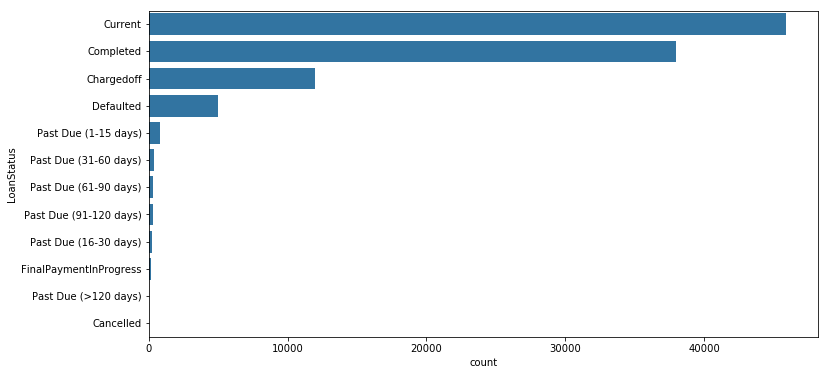

In [27]:
# Ploting the distribution of LoanStatus
base_color=sb.color_palette()[0]
LoanStatus_order=df_clean["LoanStatus"].value_counts().index
fig, ax = plt.subplots(figsize=(12, 6))
sb.countplot(data=df_clean, y='LoanStatus', color=base_color, ax=ax, order=LoanStatus_order)


- The most status is Current followd by completed, Chargedoff and Defaulted and Canceled loans are almost 0.

Text(0.5, 1.0, 'Income Range count')

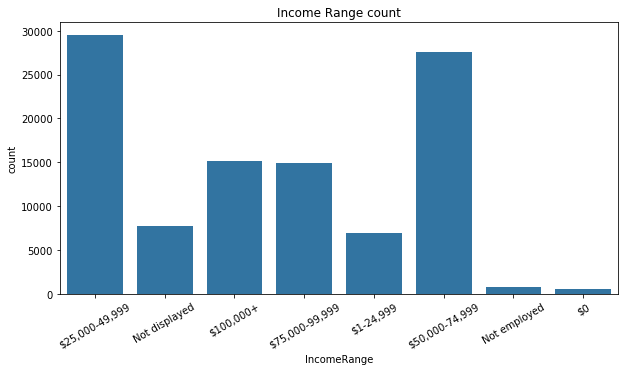

In [28]:
# Ploting the distribution of IncomeRange count
plt.figure(figsize = [10, 5])
sb.countplot(data = df_clean, x = 'IncomeRange', color = sb.color_palette()[0])
plt.xticks(rotation = 30);
plt.title("Income Range count")


- The most common Income Range was between 50k and 75k with about 24000 borrowers, then comes the range between 25k and 50k with 22000 borrowers and in the third place we have the ranges [75k, 100k] and [>100k ] with 14000 borrowers approximately

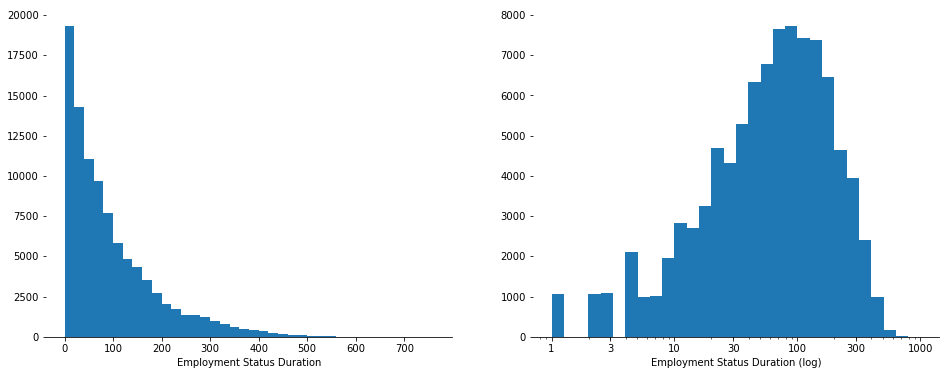

In [29]:

# Ploting the distribution of EmploymentStatusDuration
binsize = 20
bins = np.arange(0, df_clean.EmploymentStatusDuration.max()+binsize, binsize)
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)
ax[0].hist(df_clean.EmploymentStatusDuration, color=base_color, bins=bins)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel('Employment Status Duration');

# Ploting the log of EmploymentStatusDuration
log_bins = 10 ** np.arange(0, 3.0+0.1, 0.1)
ticks = [ 1, 3, 10, 30, 100, 300, 1000]
ax[1].hist(df_clean.EmploymentStatusDuration, color=base_color, bins=log_bins)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xscale('log')
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(ticks)
ax[1].set_xlabel('Employment Status Duration (log)');

- Employment Status Duration has a long-tailed distribution with a lot of emplyees between $0 and 100$ months in their current position
- when plotted the log-scale, the distribution is roughly normal with a peak around $80 and 90$ months.

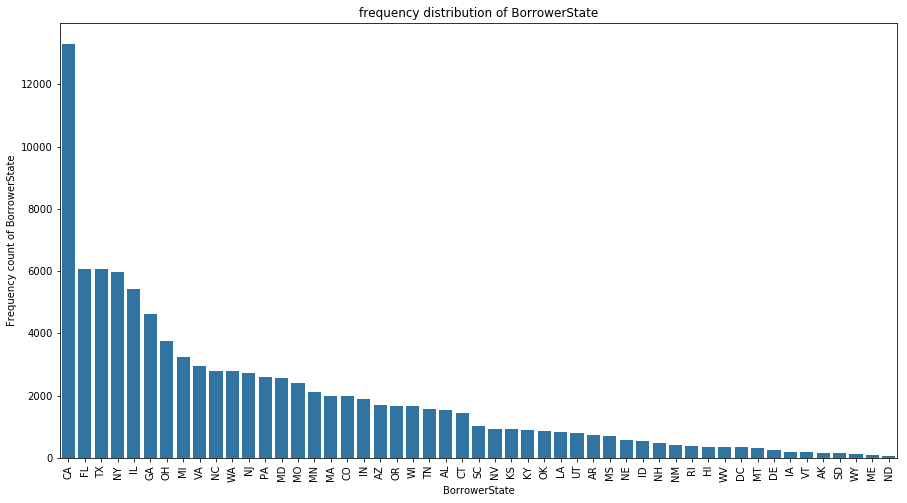

In [30]:
# Ploting the distribution of BorrowerState
Borrower_State_order =df_clean['BorrowerState'].value_counts().index
color_base = sb.color_palette()[0]
sb.countplot(data= df_clean, x= 'BorrowerState',color=color_base, order =Borrower_State_order);
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.ylabel('Frequency count of BorrowerState')
plt.title("frequency distribution of BorrowerState")
plt.xticks(rotation=90);

- We can see from the plot that California is the most BorrowerState followed by Texas, New York, Florida as second most BorrowerState.

Text(0.5, 1.0, 'Loan Original Amount Distribution')

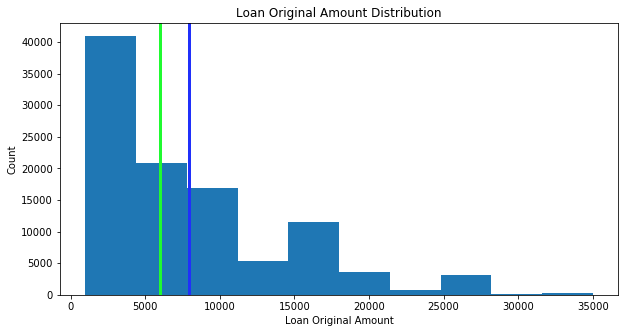

In [31]:
# Ploting Loan Original Amount Distribution
plt.figure(figsize=(10, 5))
plt.hist(df_clean.LoanOriginalAmount, color=base_color)
plt.axvline(x=df_clean.LoanOriginalAmount.mean(), color='#2030fa', linewidth=3) # Show the mean with a blue virtical line
plt.axvline(x=df_clean.LoanOriginalAmount.median(), color='#20fa30', linewidth=3); # Show the median with a  green virtical line
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.title('Loan Original Amount Distribution')

- Since mean exceeds the median , the distribution has a right skewed distribution, with a lot of loans between 5k and 10k , and few higher than 30k.

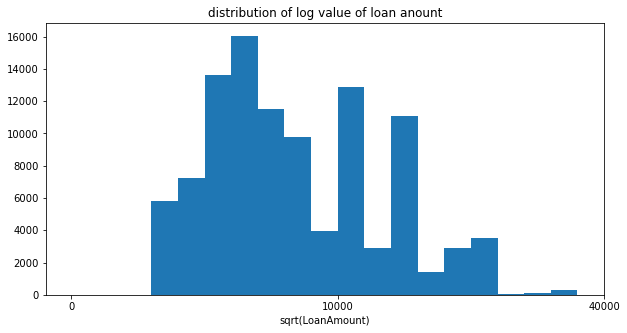

In [32]:
def sqrt_trans(x, inverse = False):

    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2
plt.figure(figsize=(10, 5))
bin_edges = np.arange(0, sqrt_trans(df_clean.LoanOriginalAmount.max())+10, 10);
plt.hist(df_clean.LoanOriginalAmount.apply(sqrt_trans), bins = bin_edges);
tick_locs = np.arange(0, sqrt_trans(df_clean.LoanOriginalAmount.max())+100, 100);
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));
plt.title("distribution of log value of loan anount");
plt.xlabel("sqrt(LoanAmount)");

- After transformation we can see the distribution more clearly with the higher amount loan also. Because minimum loan amount is 1000 , we can see there is no data in left most part of graph

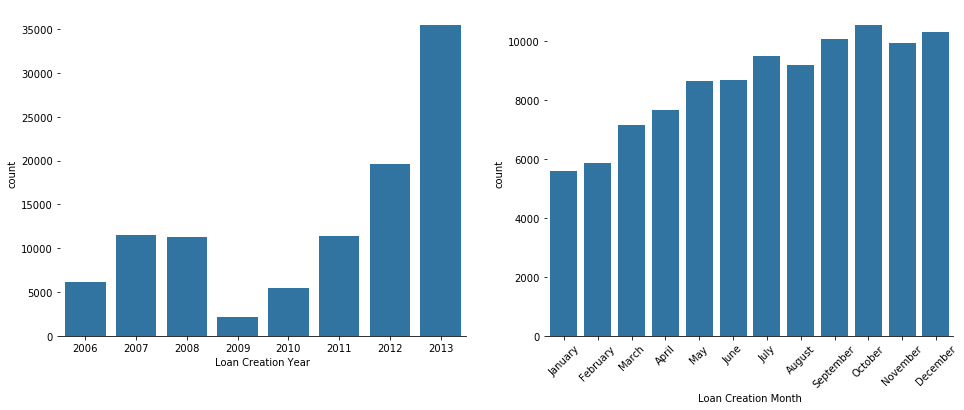

In [33]:

# Creating plots for listing creation data by year and month
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)
g = sb.countplot(x=df_clean.ListingCreationDate.dt.year, color=base_color, ax=ax[0])
sb.despine(left=True)
g.set(xlabel='Loan Creation Year');

order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']
g = sb.countplot(x=df_clean.ListingCreationDate.dt.month_name(), order=order, color=base_color, ax=ax[1])
sb.despine(left=True)
g.set(xlabel='Loan Creation Month')
plt.xticks(rotation=45);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I found that:
- most Term of Loan corresponds to 3 year and another some belongs to 5 year Term .
- Most of the APR is between  0.10 and 0.35. There is an abnormal spike at rate = 0.36.
- The most status is Current followd by completed, Chargedoff and Defaulted and Canceled loans are almost 0.
- The most common Income Range was between 50k and 75k with about 24000 borrowers, then comes the range between 25k and 50k with 22000 borrowers.
- Employment Status Duration has a lot of emplyees between  0𝑎𝑛𝑑100  months in their current position
- California is the most BorrowerState followed by Texas, New York, Florida as second most BorrowerState.
- Maximum count of Loan's Original Amount belongs to the range 2000-6000$.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- When I checked the number of Loans per year we found a drop in numbers in 2009.
- The most reason for loans is 'Debt Consilidations', Most of individuals were from California state.
- There is not much unsual distribution for most of the features. No feature shows outliers, only the LoanOriginalAmount has some data entry for higher loan amount, so I transformed it to square root transformation.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [34]:
# Listing the numeric variables
num_cols = ['BorrowerAPR', 'ProsperScore', 'EmploymentStatusDuration', 
            'LoanCurrentDaysDelinquent', 'LoanOriginalAmount']

# Listing the categoric variables
cat_cols = ['Term', 'LoanStatus', 'ProsperScore',
            'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange']

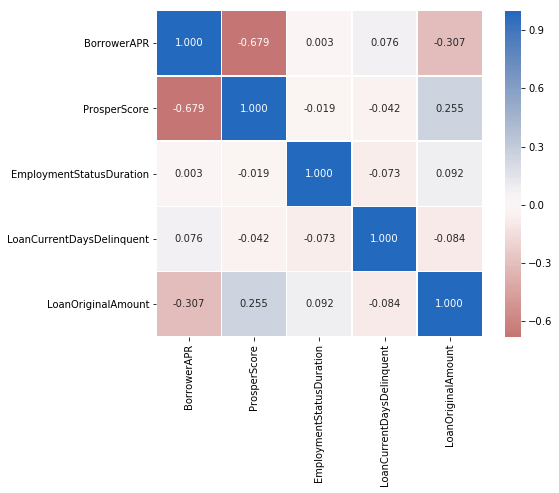

In [35]:
# Looking at correlation plot by Heatmap Plot
plt.figure(figsize=(8, 6))
sb.heatmap(df_clean[num_cols].corr(),annot=True,fmt='.3f',cmap='vlag_r',center=0,linewidths=.5,square=True);

- The heatmap shows a correlation coefficient of -0.307 between loan amount and borrower APR.


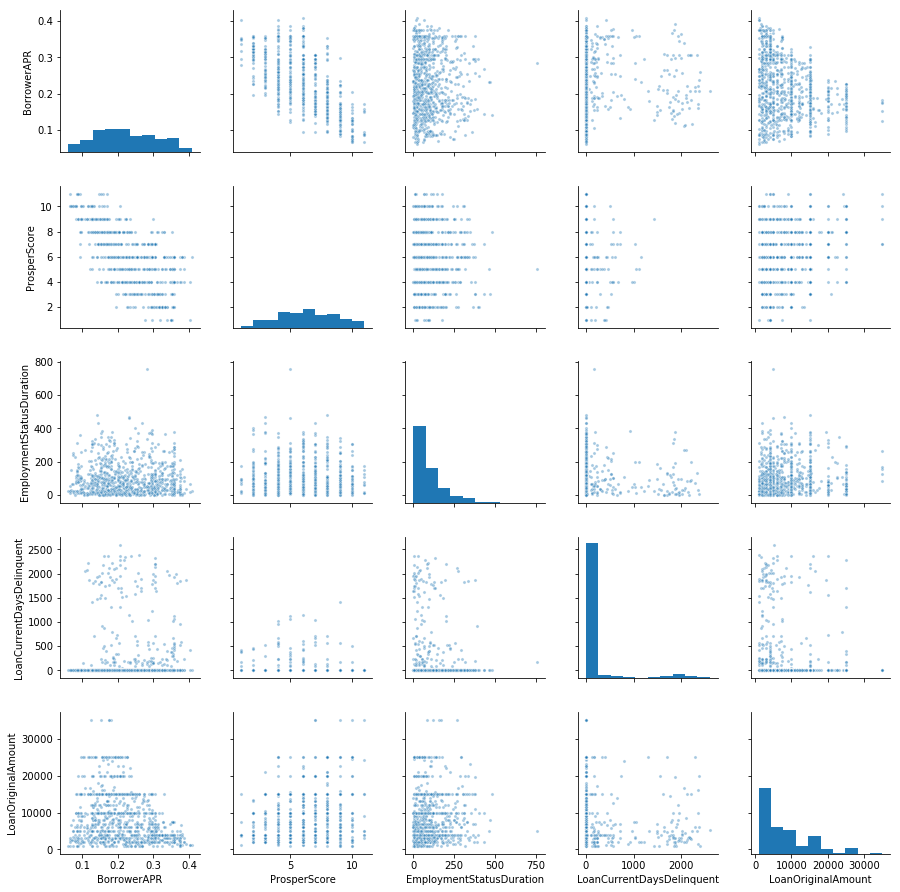

In [36]:
# Sample for Pair Grid
loan_samp = df_clean.sample(1000)

# Pair grid plot for numeric variables
g = sb.PairGrid(data=loan_samp, vars=num_cols)
g = g.map_diag(plt.hist, color=base_color)
g.map_offdiag(sb.scatterplot, color=base_color, alpha=0.4, s=10);

- The correlation coefficient between borrower APR and LoanOriginalAmount is a moderate negative correlation, wich means higher loan original amount is expected to have lower borrower APR.
- There are a negative relationship between BorrowerAPR and ProsperScore we may expect that the bigger the score the less the interest rate.

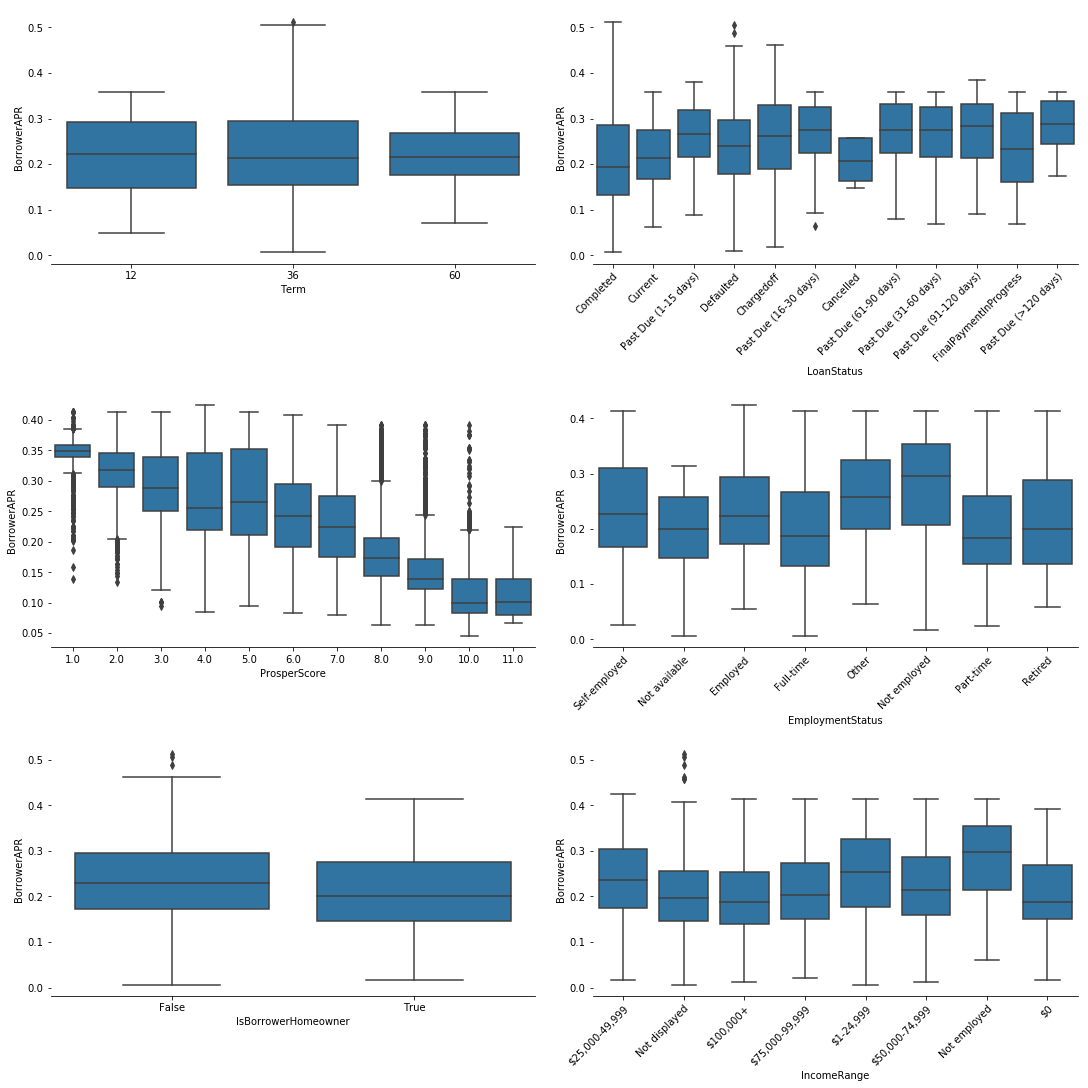

In [37]:
# plot the vars with unique values less than 15
fig1, ax = plt.subplots(figsize=(15, 15), ncols=2, nrows=3, constrained_layout=True) 
ax = ax.flatten()

# Plotting loop
for i, var in enumerate(cat_cols):
    sb.boxplot(data=df_clean, x=var, y='BorrowerAPR',color= sb.color_palette()[0], ax=ax[i])
    sb.despine(left=True, ax=ax[i])
    if var in ['LoanStatus', 'EmploymentStatus', 'IncomeRange']:
            plt.setp(ax[i].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

- There is no clear relation between BorrowerAPR and the payment Term.

- There are a negative relation between BorrowerAPR and ProsperScore.
- There is a relation between BorrowerAPR and EmploymentStatus as it tends to be lower for emplyed individuals than not employed with some cosiderations for retired and part time jobs to be the lowest.
- The BorrowerAPR is lower for Homeowners than if the individual doesn't own a house.
-  The BorrowerAPR tend to be high for not emploed individuals in IncomeRange with some considerations for people with 0 income.


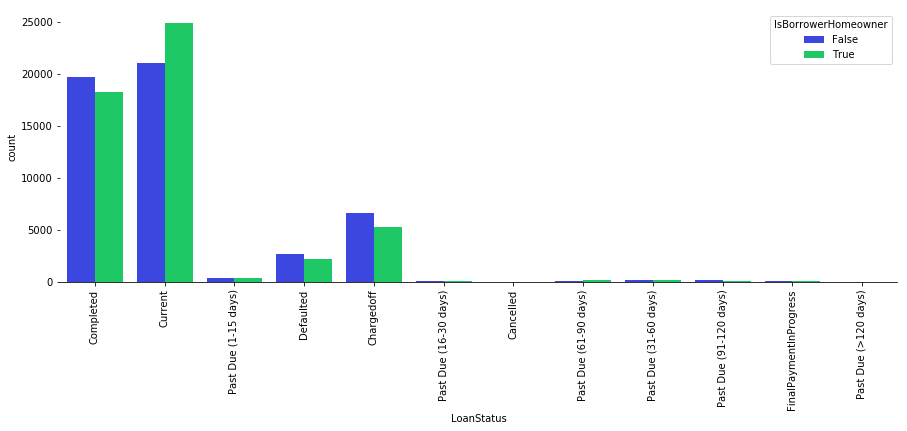

In [38]:
# plotting LoanStatus vs IsBorrowerHomeOwner
plt.figure(figsize=(15, 5))

sb.countplot(data=df_clean,
              x='LoanStatus',
              hue='IsBorrowerHomeowner',
              palette=['#2030fa', '#00e560'])
sb.despine(left=True)
plt.xticks(rotation=90);

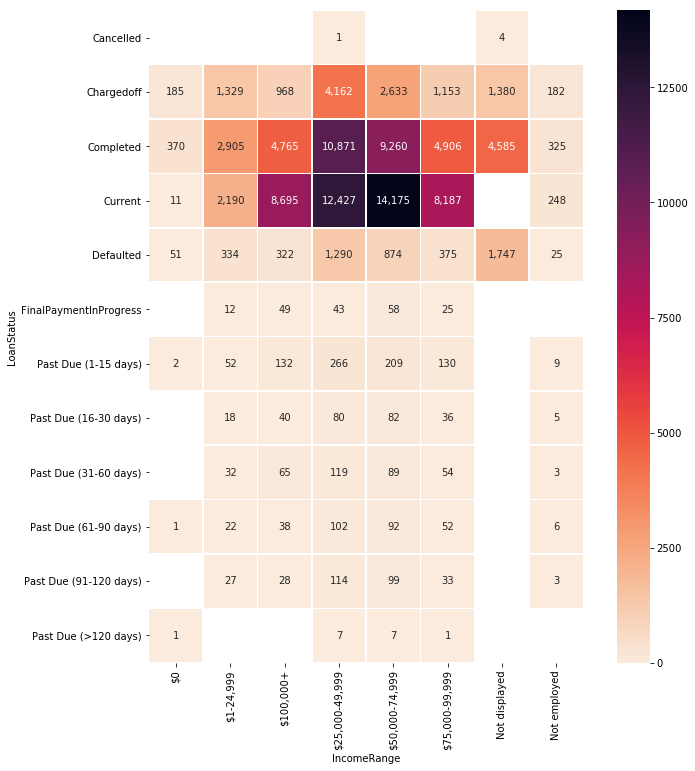

In [39]:
# Preparing for HeatMap plot 
df_clean_income = df_clean.groupby(['LoanStatus', 'IncomeRange']).count()['ListingCreationDate'].reset_index()
df_clean_income.columns = ['LoanStatus', 'IncomeRange', 'Count']
df_clean_income = df_clean_income.pivot(index = 'LoanStatus', columns = 'IncomeRange', values = 'Count').fillna(0)

# Heatmap Plot
plt.figure(figsize=(12, 12))
sb.heatmap(df_clean_income,annot=True,fmt=',.0f',cmap='rocket_r',mask=(df_clean_income<0.5),linewidths=.5,square=True);

- we can see here the distribution of IncomeRange vary accross the LoanStatus.

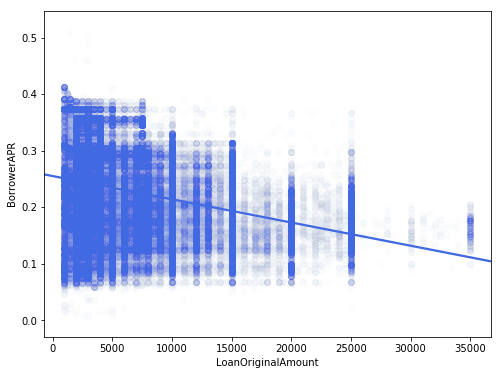

In [40]:
# looking at BorrowerAPR in relation to LoanOriginalAmount for all variables in the dataset
plt.figure(figsize = [8, 6])
sb.regplot(data = df_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01}, color = 'royalblue');

- Based on this plot, borrower APR has a affect with original loan amounts and decreases as the loan original amount decreases indicating an overall negative corrlation between borrower APR and original loan amount.


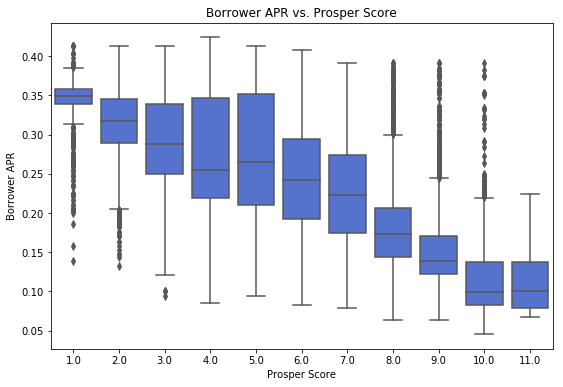

In [41]:
# plotting the relation between BorrowerAPR and ProsperScore
plt.figure(figsize=[9,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=df_clean, x='ProsperScore', y='BorrowerAPR', color='royalblue')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Score');

- Based on this figure, borrower APR decreases as prosper ratings increase. Borrowers with higher prosper ratings recieve lower APRs indicating that ratings influence borrower APR.

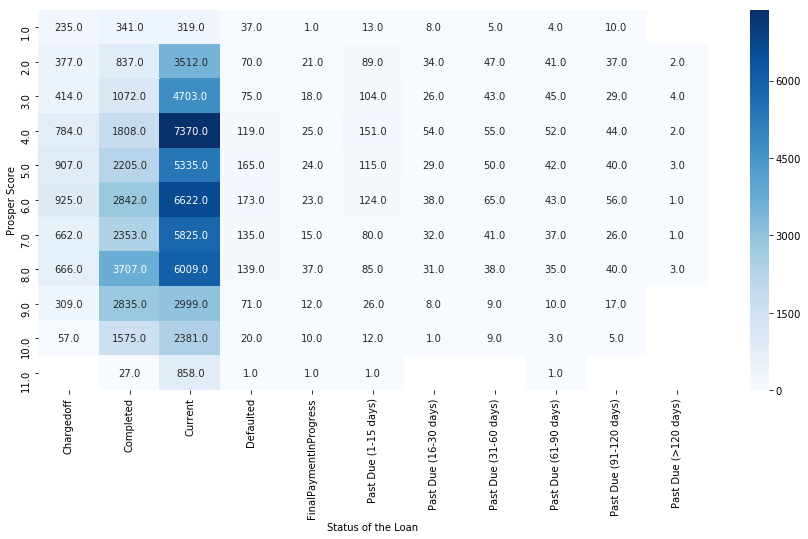

In [42]:
# Preparing for HeatMap plot
df_cat_counts = df_clean.groupby(['LoanStatus', 'ProsperScore']).size()
df_cat_counts = df_cat_counts.reset_index(name = 'count')
df_cat_counts = df_cat_counts.pivot(index = 'ProsperScore', columns = 'LoanStatus', values = 'count')

#plotting ProsperScore against LoanStatus with help of a heat map
plt.figure(figsize = [15,7])
mask = df_cat_counts.isnull()
sb.heatmap(df_cat_counts, annot = True, fmt = '.1f', cmap = 'Blues',mask = mask)
plt.xlabel('Status of the Loan')
plt.ylabel('Prosper Score');

- The Prosper Score seem to affect the outcome of the loan: 
- when a loan is completed the most borrower an Prosper Score of 8  
- while most borrower with defaulted and charged-off loans have an Prosper Score of 6. 
- The most comon Prosper Score for borrowers with loans that have past due payments is 4

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> LoanOriginalAmount  and ProsperScore are the most features that affect the BorrowerAPR as the larger they are the lower the interest rate is.
> LoanStatus is effected the most by IncomeRange

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes,IncomeRange and LoanOriginalAmount is positively correlated we can expect that the higher IncomeRange the higher the loan amount the individual can borrow.This means that borrowers with a higher monthly income can loan more money.

## Multivariate Exploration


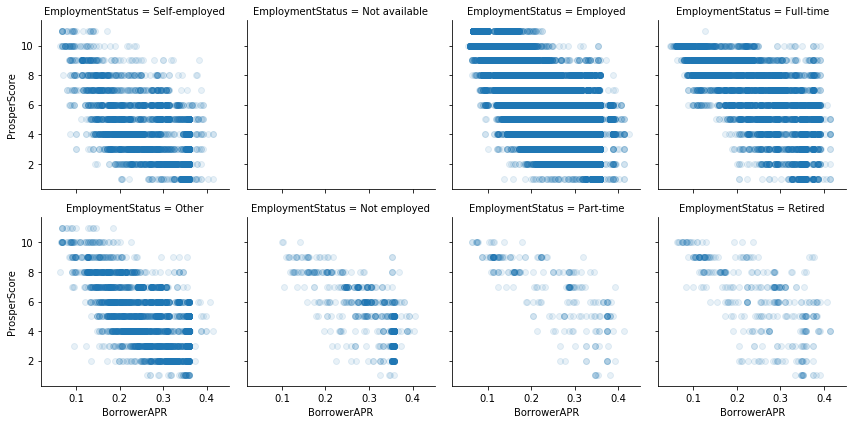

In [43]:
# BorrowerAPR Vs EmploymentStatus & ProsperScore
g = sb.FacetGrid(data = df_clean, col = 'EmploymentStatus', col_wrap = 4, height= 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore');

- The FacetGrid of the BorrowerAPR according to Prosper score for the different IncomeRange categories highlighting EmploymentStatus shows that Employed and Full time EmploymentStatus are more likely to have higher IncomeRange than other categories and the higher the IncomeRange lower is the correlation between BorrowerAPR and ProsperScore.

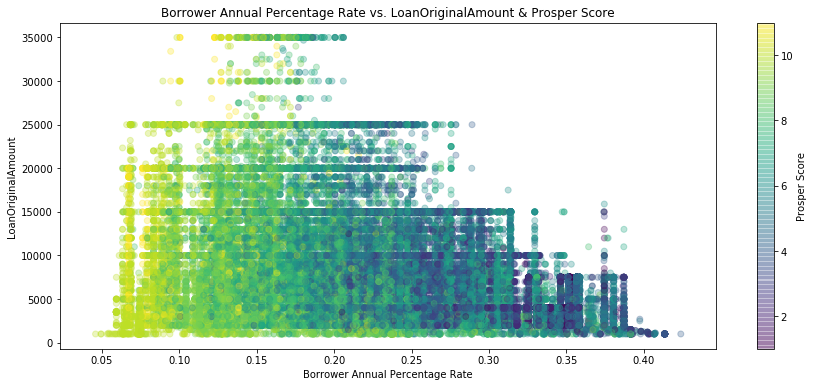

In [44]:
# BorrowerAPR vs. LoanOriginalAmount & prosperscore
plt.figure(figsize = [14.7, 6]) 
plt.scatter(data = df_clean,x = 'BorrowerAPR', y = 'LoanOriginalAmount',  c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'Prosper Score')
plt.title('Borrower Annual Percentage Rate vs. LoanOriginalAmount & Prosper Score')
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('LoanOriginalAmount');

- LoanOriginalAmount and Borrower APR have positively correlated.However the Prosper Score and borrower APR are negatively correlated.
- There doesn't seems to be any relationship between LoanOriginalAmount and Prosper Score

In [45]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 12, 1)
    bins_y = np.arange(0, 0.6, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

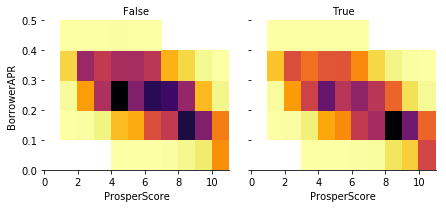

In [46]:
# Ploting heatmap for ProsperScore and BorrowerAPR by IsBorrowerHomeowner
df_hist2d = df_clean.query('EmploymentStatus != "Not available"').copy()
g = sb.FacetGrid(data = df_hist2d,
                 col='IsBorrowerHomeowner',
                 col_wrap = 4,
                 height = 3)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_titles('{col_name}')
g.despine(left=True);

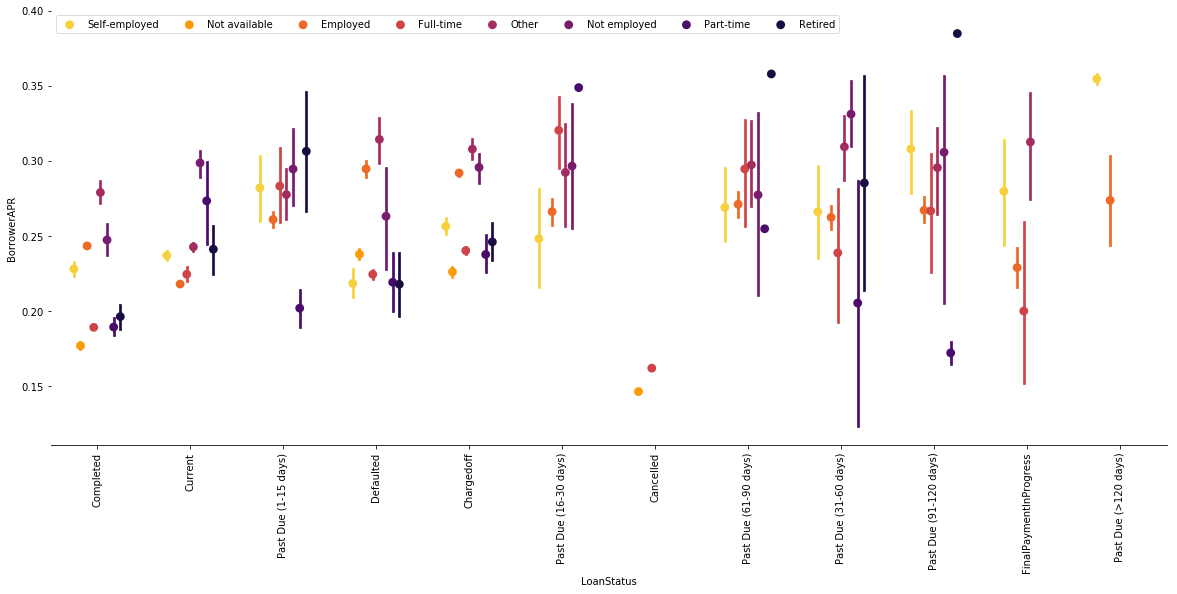

In [47]:
# Plotting the relation between ProsperScore, BorrowerAPR and EmployementStatus
fig, ax = plt.subplots(figsize=(20, 8))
sb.pointplot(data=df_clean,x='LoanStatus',y='BorrowerAPR',hue='EmploymentStatus',linestyles="",dodge=0.5,palette='inferno_r')
sb.despine(left=True)
plt.legend(loc=2, ncol=8, framealpha=0.7)
plt.xticks(rotation=90)
plt.show();

- Not employed idividuals have the highest APR for current loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Not employed idividuals have the highest APR for current loans .
- Current Loan Status has the lowest BorrowerAPR followed by completed Loan Status.
- Additionally, we find that higher income range results in lower BorrowerAPR.
- Completed, charged off and defaulted categories have the lowest LoanOriginalAmount according to EmploymentStatus.

### Were there any interesting or surprising interactions between features?

- I found some interesting features and relationships between variables. Some of them were quite unexpected as well such as no relationship between Average Loan amount  and Prosper score. Also Average Loan amount was increasing from 2006 to 2008 until it dropped in 2009 regards then it rise again and continue increasing while the average Borrower APR was decreasing.Similarly there was a sudden decrease in year 2014.
